In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [96]:
pd.set_option("display.precision", 3)
df = pd.read_csv(r'Student_Performance.csv')

In [97]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [99]:
duplicated = df.duplicated()
df[duplicated]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [100]:
df.drop_duplicates(inplace=True)

In [101]:
encoder = LabelEncoder()
df['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])

In [102]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


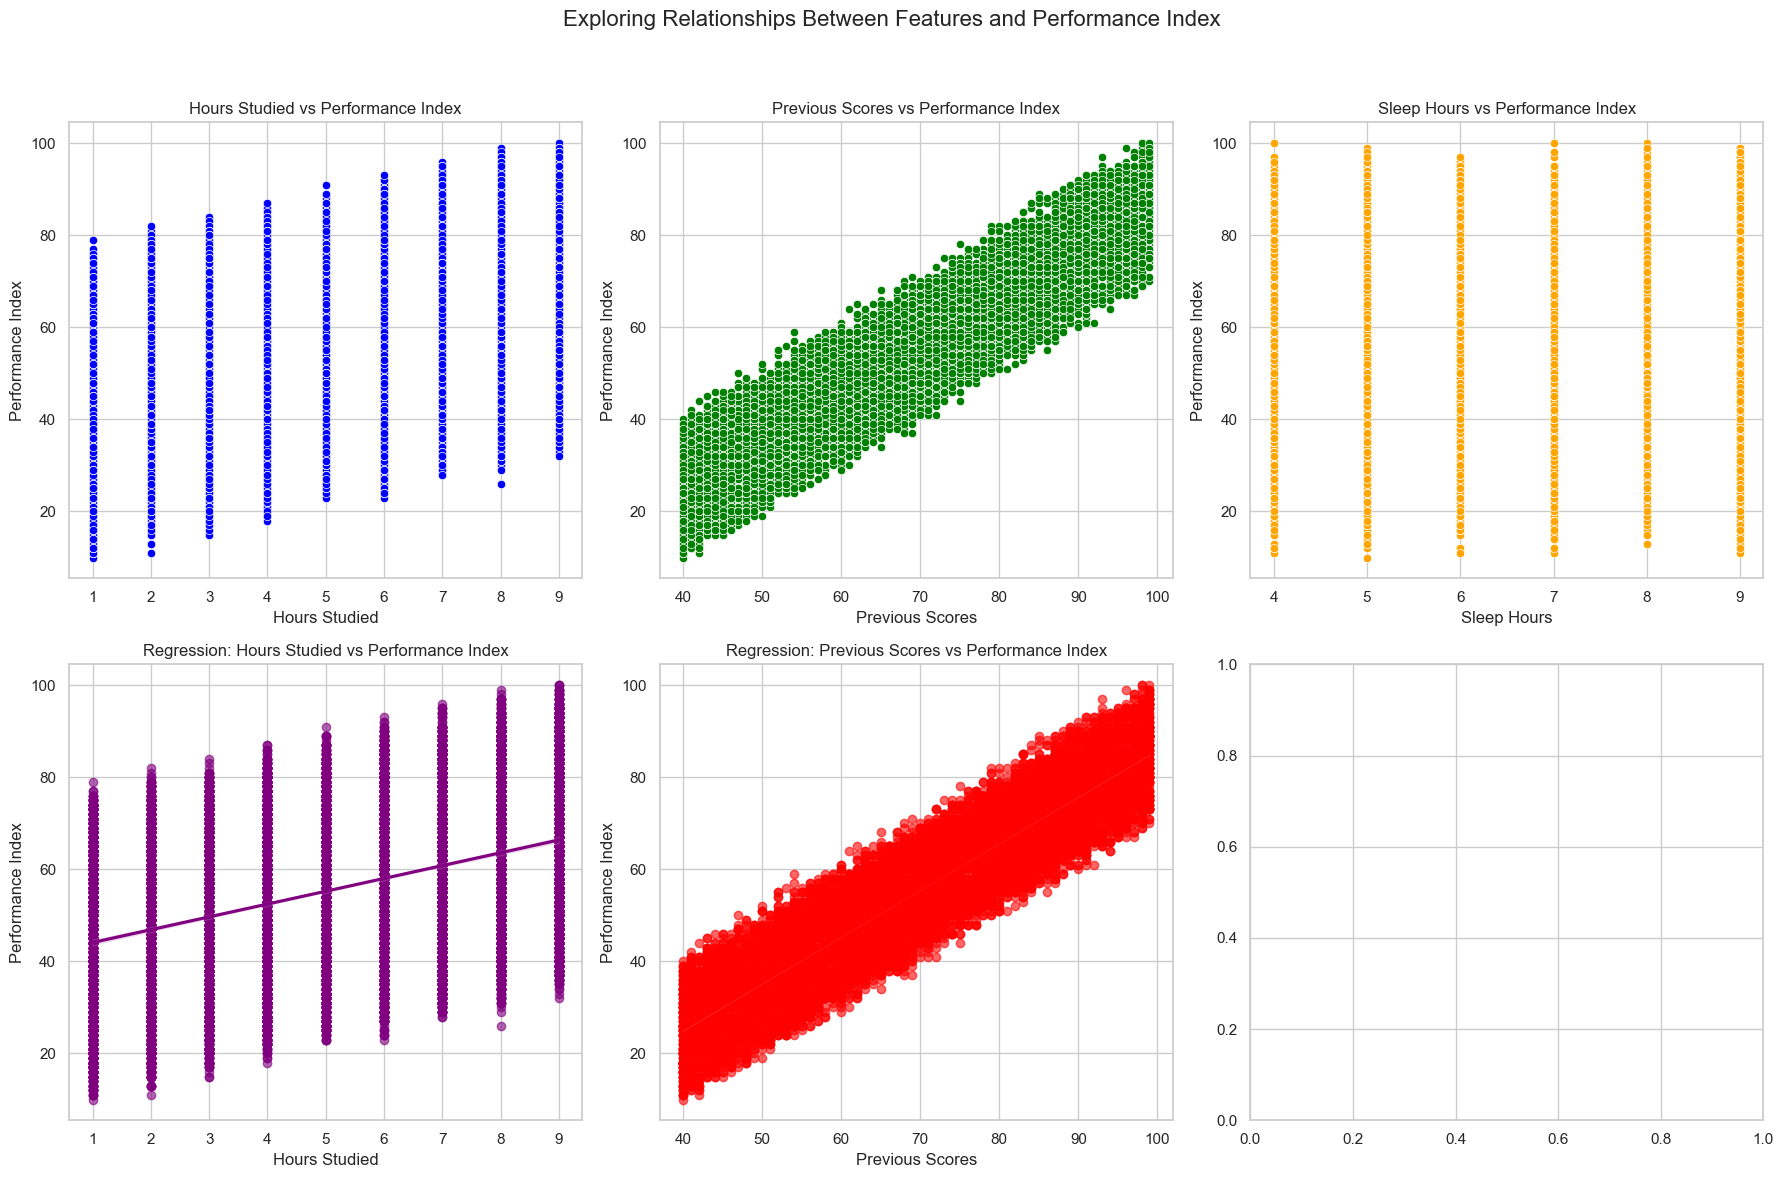

In [103]:

# Set style for seaborn plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Exploring Relationships Between Features and Performance Index", fontsize=16)

# Scatter plot for Hours Studied vs Performance Index
sns.scatterplot(data=df, x="Hours Studied", y="Performance Index", ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Hours Studied vs Performance Index")

# Scatter plot for Previous Scores vs Performance Index
sns.scatterplot(data=df, x="Previous Scores", y="Performance Index", ax=axes[0, 1], color="green")
axes[0, 1].set_title("Previous Scores vs Performance Index")

# Scatter plot for Sleep Hours vs Performance Index
sns.scatterplot(data=df, x="Sleep Hours", y="Performance Index", ax=axes[0, 2], color="orange")
axes[0, 2].set_title("Sleep Hours vs Performance Index")

# Regression plot for Hours Studied vs Performance Index
sns.regplot(data=df, x="Hours Studied", y="Performance Index", ax=axes[1, 0], color="purple", scatter_kws={"alpha": 0.6})
axes[1, 0].set_title("Regression: Hours Studied vs Performance Index")

# Regression plot for Previous Scores vs Performance Index
sns.regplot(data=df, x="Previous Scores", y="Performance Index", ax=axes[1, 1], color="red", scatter_kws={"alpha": 0.6})
axes[1, 1].set_title("Regression: Previous Scores vs Performance Index")


# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [104]:
corr = df.corr()
corr

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000,-0.011,0.005,0.002,0.016,0.375
Previous Scores,-0.011,1.000,0.010,0.008,0.009,0.915
Extracurricular Activities,0.005,0.010,1.000,-0.024,0.014,0.026
Sleep Hours,0.002,0.008,-0.024,1.000,0.005,0.050
Sample Question Papers Practiced,0.016,0.009,0.014,0.005,1.000,0.043
Performance Index,0.375,0.915,0.026,0.050,0.043,1.000


<Axes: >

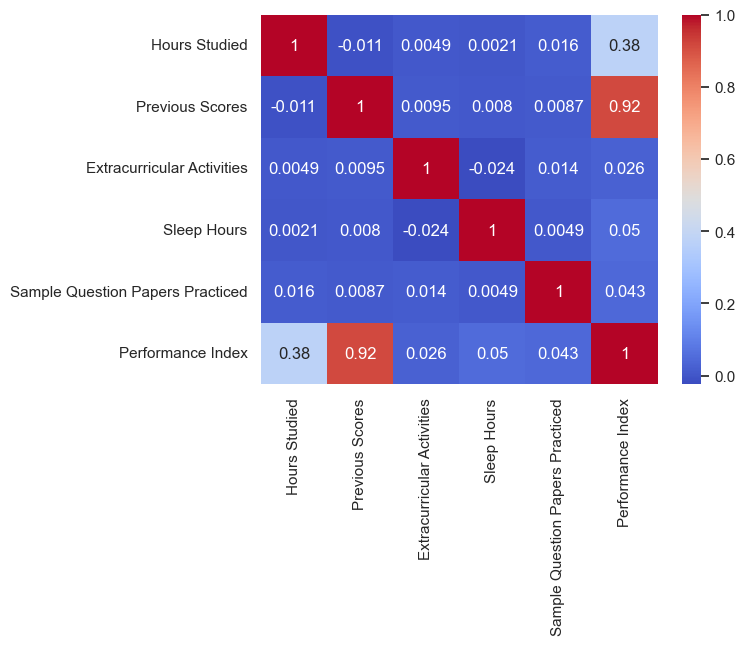

In [105]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [106]:
weak_correlations = corr[abs(corr['Performance Index'])< 0.05].index
weak_correlations

Index(['Extracurricular Activities', 'Sample Question Papers Practiced'], dtype='object')

In [107]:
df.drop(weak_correlations,axis=1,inplace=True)

In [108]:
df

,Hours Studied,Previous Scores,Sleep Hours,Performance Index
0,7,99,9,91.0
1,4,82,4,65.0
2,8,51,7,45.0
3,5,52,5,36.0
4,7,75,8,66.0
...,...,...,...,...
9995,1,49,4,23.0
9996,7,64,8,58.0
9997,6,83,8,74.0
9998,9,97,7,95.0


In [109]:
scaler = MinMaxScaler()
df['Previous Scores'] = scaler.fit_transform(df[['Previous Scores']])
df['Performance Index'] = scaler.fit_transform(df[['Performance Index']])


In [110]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Performance Index
0,7,1.000,9,0.900
1,4,0.712,4,0.611
2,8,0.186,7,0.389
3,5,0.203,5,0.289
4,7,0.593,8,0.622


In [111]:
x = df.drop(['Performance Index'],axis=1)
y = df['Performance Index']

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_squared_error,r2_score

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [114]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [115]:
LR_predictions = LR.predict(x_test)
LR_actual = scaler.inverse_transform(LR_predictions.reshape(-1, 1))


In [116]:
MAE = mean_absolute_error(LR_predictions,y_test)
print('mean absolute error is ',MAE)
MSE = mean_squared_error(LR_predictions,y_test)
print('mean_squared_error is ',MSE)
R2_score = r2_score(LR_predictions,y_test)
print('R2 Score ', R2_score*100)

mean absolute error is  0.019522244449670708
mean_squared_error is  0.0005962242872743045
R2 Score  98.68022559997368


In [117]:
SVM = SVR()
SVM.fit(x_train,y_train)

SVR()

In [118]:
SVM_predictions = SVM.predict(x_test)
SVM_actual = scaler.inverse_transform(SVM_predictions.reshape(-1,1))

In [119]:
MAE = mean_absolute_error(SVM_predictions,y_test)
print('mean absolute error is ',MAE)
MSE = mean_squared_error(SVM_predictions,y_test)
print('mean_squared_error is ',MSE)
R2_score = r2_score(SVM_predictions,y_test)
print('R2 Score ', R2_score*100)

mean absolute error is  0.02995498373482812
mean_squared_error is  0.001438852239021292
R2 Score  95.9987250128668


In [120]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [121]:
DT_predictions = DT.predict(x_test)
DT_actual = scaler.inverse_transform(DT_predictions.reshape(-1,1))

In [122]:
MAE = mean_absolute_error(DT_predictions,y_test)
print('mean absolute error is ',MAE)
MSE = mean_squared_error(DT_predictions,y_test)
print('mean_squared_error is ',MSE)
R2_score = r2_score(DT_predictions,y_test)
print('R2 Score ', R2_score*100)

mean absolute error is  0.02451223628691983
mean_squared_error is  0.0009334888472865836
R2 Score  97.95126785993745


In [123]:
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [124]:
KNN_predictions = KNN.predict(x_test)
KNN_actual = scaler.inverse_transform(KNN_predictions.reshape(-1,1))

In [125]:
MAE = mean_absolute_error(KNN_predictions,y_test)
print('mean absolute error is ',MAE)
MSE = mean_squared_error(KNN_predictions,y_test)
print('mean_squared_error is ',MSE)
R2_score = r2_score(KNN_predictions,y_test)
print('R2 Score ', R2_score*100)

mean absolute error is  0.021847538677918426
mean_squared_error is  0.0007449338959212376
R2 Score  98.34977737230994
